In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [3]:
os.chdir("C:/Users/Aleksandr/Desktop/CSC/Data Analysis/lab 1/Shad_AD on Python_1_01/задача_леденцы/")

In [4]:
df = pd.read_csv("Леденцы.dat", sep=';', engine='python')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [5]:
from sklearn.cluster import KMeans
# инициализация модели
model = KMeans(n_clusters=4, random_state=42, max_iter=300, n_init=10, verbose=0 )

In [6]:
# подгонка модели по данным из df
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [7]:
# координаты центров кластеров
model.cluster_centers_

array([[4.84545455, 4.8       , 4.83636364, 4.68181818, 3.03636364,
        3.03636364, 3.        , 2.99090909, 3.07272727, 3.04545455,
        3.04545455],
       [2.82407407, 2.83333333, 2.76851852, 2.62037037, 2.61111111,
        2.58333333, 2.75      , 2.91666667, 4.9537037 , 4.81481481,
        4.86111111],
       [3.        , 2.96610169, 2.96610169, 2.91525424, 2.91525424,
        2.94915254, 4.91525424, 4.91525424, 3.        , 3.        ,
        3.        ],
       [3.        , 3.        , 3.        , 3.        , 4.85245902,
        4.85245902, 3.        , 2.91803279, 2.75409836, 2.75409836,
        2.75409836]])

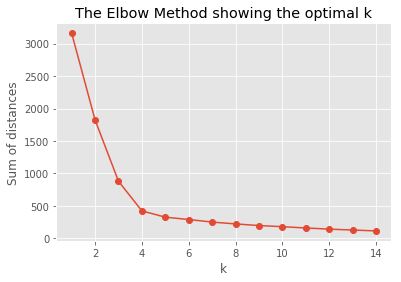

In [8]:
K = range(1, 15)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Как было рассмотрено в первой лабораторной, так и здесь, оптимальное число кластеров равно 4.

In [9]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [10]:
df.groupby('cluster').size()

cluster
0    110
1    108
2     59
3     61
dtype: int64

Хорошо различимы 4 категории людей по кластерам:

    0) те, кто сосут леденцы из-за первых 4х факторов. А именно - поддерживать свежей полость рта, иметь приятное дыхание, не переживать на этот счет.
    1) головастые ребята, которым нужно сосредоточиться и подумать о чем-то, а конфета во рту помогает этому.
    2) принимающие леденцы в качестве лекарства. Против горла, носа и для улучшения самочувствия.
    3) сладкоежки, которые кушают их, потому что любят сладкое.